# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42) # 爲了讓每一次運作的結果都一樣，這裏將random的種子設定固定住，實際分析時請不要固定住random種子

# K- means Clustering 

## K-Means （模擬生成資料集）

在這裏我們扮演著“上帝”，我們已經知道了資料的分佈（因爲是我們自己生產的資料），這樣比較方便討論實際分析時可能遇到的情況。

但是請記得，在現實生活中，我們**不可能知道資料本身的分佈**（如果知道了就不需要分析和探勘了），我們的任務是**根據給定的資料及，估計其背後的分佈**。

### 生成資料

這裏是模擬資料生成的code。

In [2]:
from sklearn.datasets import make_blobs

In [3]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]]) # 設定中心點
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1]) # 設定各中心點的標準差

In [4]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

把生成的資料畫出來

In [5]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

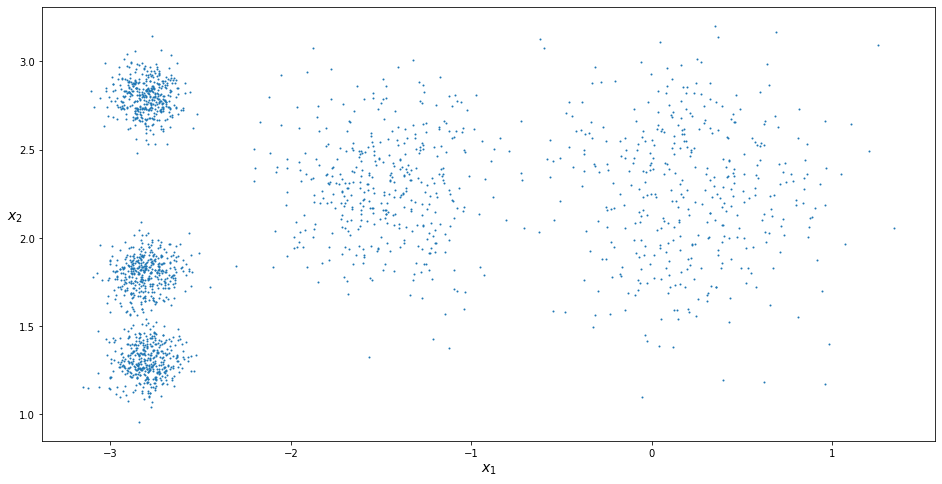

In [6]:
plt.figure(figsize=(16, 8))
plot_clusters(X)
plt.show()

### 建模

In [9]:
from sklearn.cluster import KMeans

In [8]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X) # 以 x 預測 y 歸於哪一個叢集cluster

In [9]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

5個叢集的中心

In [10]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

給定新的 x 值 預測它被歸到哪一組

In [11]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

### 決策邊界（Voronoi Diagram）

In [12]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

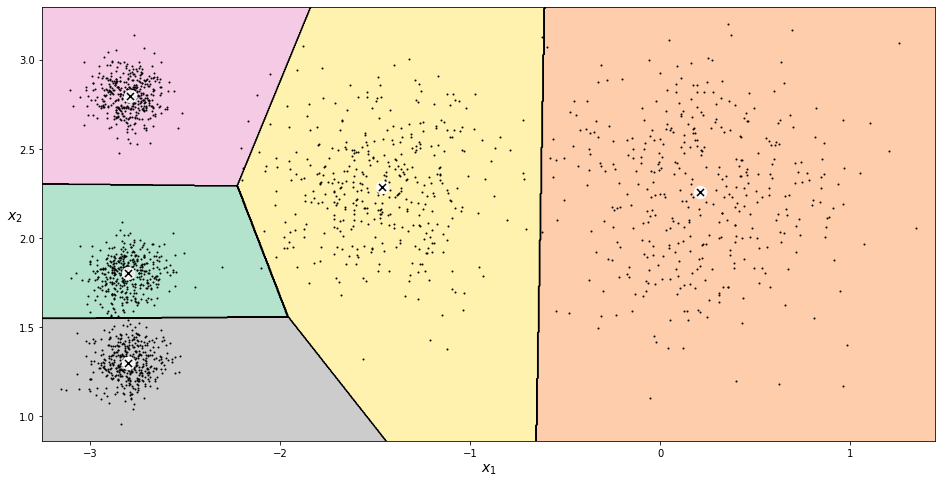

In [13]:
plt.figure(figsize=(16, 8))
plot_decision_boundaries(kmeans, X)
plt.show()

### Hard Clustering _vs_ Soft Clustering

sklearn 除了提供每一個x被歸到那一組（Hard Clustering），也提供了該x和各個中心的距離（Soft Clustering）。

In [ ]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

### Inertia（一個評估模型表現的指標，參考ppt）

In [14]:
kmeans.inertia_

211.5985372581684

inertia = 每個點到他自己的中心點的距離平方和

In [18]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816868

### K-means有時會陷入僵局

In [19]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10, # 加入這個 n_init=10 參數，sklearn會重複同樣的 code 10 次后選出最低inertia的結果
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=11)

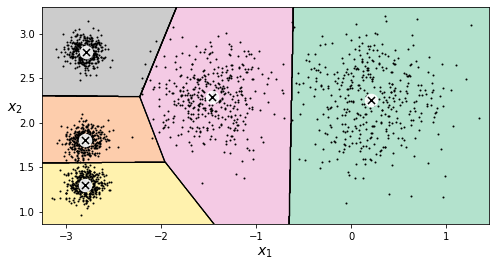

In [20]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

### 選定cluster數目

如果選的cluster數目少過實際cluster數目

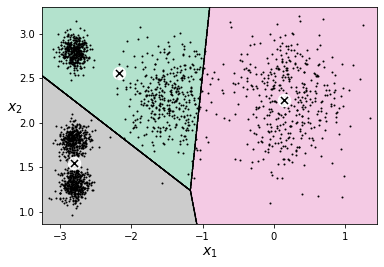

In [15]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42).fit(X)
plot_decision_boundaries(kmeans_k3, X)
plt.show()

In [16]:
kmeans_k3.inertia_

653.216719002155

如果選的cluster數目超過實際cluster數目

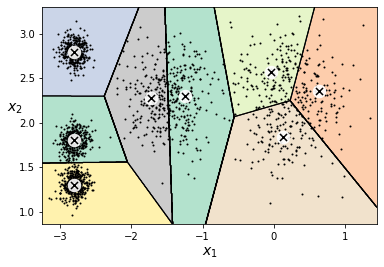

In [17]:
kmeans_k8 = KMeans(n_clusters=8, random_state=42).fit(X)
plot_decision_boundaries(kmeans_k8, X)
plt.show()

In [ ]:
kmeans_k8.inertia_

119.11983416102879

越多cluster，inertia越小。我們畫圖來看看inertia隨著cluster數目的增加的變化。

In [21]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

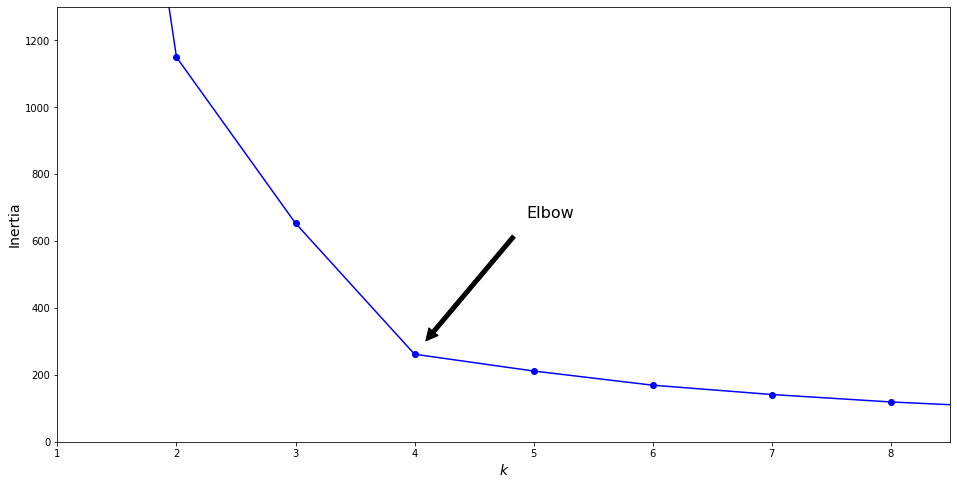

In [22]:
plt.figure(figsize=(16, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

4好像是個不錯的選擇（當然，你應該也要嘗試一下3或5）。這張圖的elbow指的不是一個值，而是一個大致的範圍。

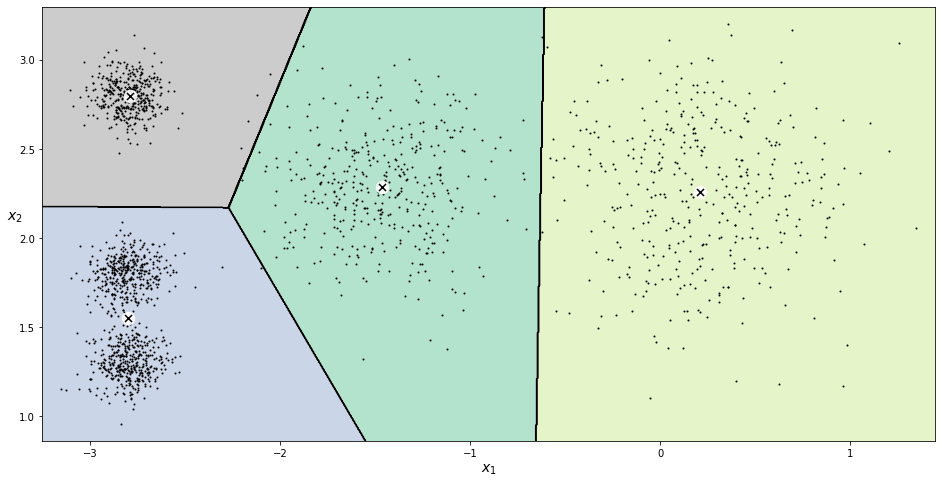

In [ ]:
plt.figure(figsize=(16, 8))
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

### Silhoutte Coefficient

另一個選擇cluster數目的方法是可以根據silhoutte coefficient：

An instance's silhouette coefficient is equal to 

**$(b - a)/\max(a, b)$** 

where $a$ is the mean distance to the other instances in the same cluster (it is the _mean intra-cluster distance_), and $b$ is the _mean nearest-cluster distance_, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's own cluster). 

The silhouette coefficient can **vary between -1 and +1**: a coefficient close to +1 means that the instance is **well inside its own cluster and far from other clusters**, while a coefficient close to 0 means that it is**close to a cluster boundary**, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster**.

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [25]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

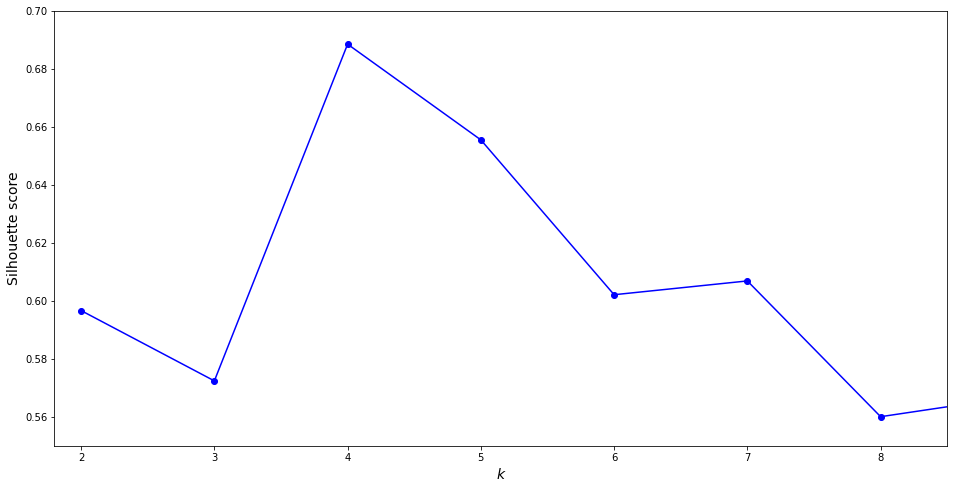

In [26]:
plt.figure(figsize=(16, 8))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

從圖中可以看到4是一個不錯的選擇（Silhoutte score 最接近一），不過5也表現得不錯，值得被考慮。

我們來畫畫看一張資訊量更高的圖，叫做 Silhoutte Diagram，紅綫為給定一個數目的cluster下，每個樣本的平均 silhoutte score，y軸色塊的大小顯示了每個cluster裏的樣本數目。

至於爲什麽會像刀的樣子？那是因爲它把各個cluster裏的每個樣本的 silhoutte score 從大排到小。

我們希望大部分 cluster 裏的 silhoutte score 都有超過紅綫。

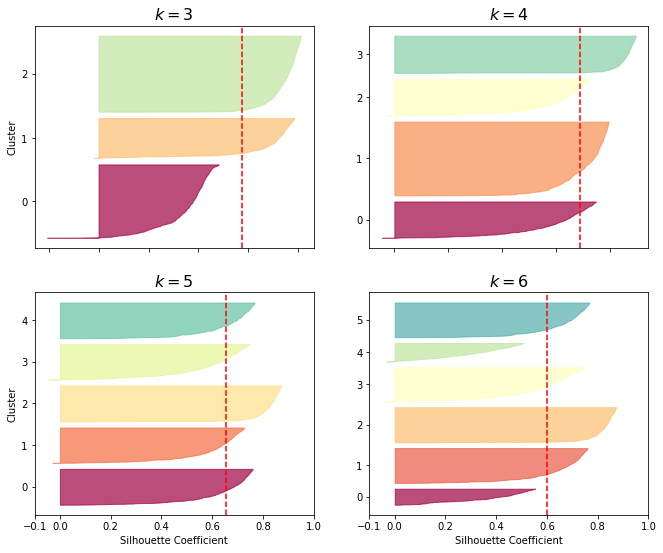

In [27]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

# 叢集分析 Cluster Analysis 實作 (愛情三角理論資料集)

不過不失爲一個簡單的介紹性質的報導：https://kknews.cc/psychology/lv6nvje.html

In [28]:
!pip install pyreadstat

     |████████████████████████████████| 2.4 MB 15.2 MB/s 
     |████████████████████████████████| 11.3 MB 49.6 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.


.sav是統計軟體SPSS使用的一種資料格式，pandas也可以讀取這種資料集，不過要先下載 pyreadstat 套件（執行上面的程式）

In [2]:
df = pd.read_spss('Love_Triangle.sav')

In [3]:
df

,A親密,B熱情,C承諾
0,9.0,6.0,11.0
1,2.0,6.0,4.0
2,12.0,10.0,11.0
3,10.0,6.0,10.0
4,2.0,5.0,4.0
...,...,...,...
225,8.0,11.0,15.0
226,11.0,15.0,10.0
227,4.0,14.0,3.0
228,3.0,7.0,7.0


In [4]:
df.columns = ['Intimacy', 'Passion', 'Commitment']

In [5]:
df.describe()

,Intimacy,Passion,Commitment
count,230.000000,230.000000,230.000000
mean,6.239130,8.569565,7.513043
std,3.177327,4.076981,3.154992
min,0.000000,0.000000,0.000000
25%,4.000000,5.000000,5.000000
50%,6.000000,8.000000,7.000000
75%,8.000000,12.000000,10.000000
max,14.000000,17.000000,16.000000


In [6]:
import altair as alt

In [7]:
pic_romance = alt.Chart(df).mark_bar().encode(
    alt.X('Intimacy:Q',bin=alt.BinParams(maxbins=20)),
    alt.Y('Passion:Q',bin=alt.BinParams(maxbins=20)),
    alt.Color('count()',scale=alt.Scale(scheme='magma'))
).properties(width = 500, height = 500)

pic_companion = alt.Chart(df).mark_bar().encode(
    alt.X('Intimacy:Q',bin=alt.BinParams(maxbins=20)),
    alt.Y('Commitment:Q',bin=alt.BinParams(maxbins=20)),
    alt.Color('count()',scale=alt.Scale(scheme='magma'))
).properties(width = 500, height = 500)

pic_fatuousness = alt.Chart(df).mark_bar().encode(
    alt.X('Passion:Q',bin=alt.BinParams(maxbins=20)),
    alt.Y('Commitment:Q',bin=alt.BinParams(maxbins=20)),
    alt.Color('count()',scale=alt.Scale(scheme='magma'))
).properties(width = 500, height = 500)

pic_romance | pic_companion | pic_fatuousness

alt.HConcatChart(...)

### 看看inertia，選cluster數目

In [10]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

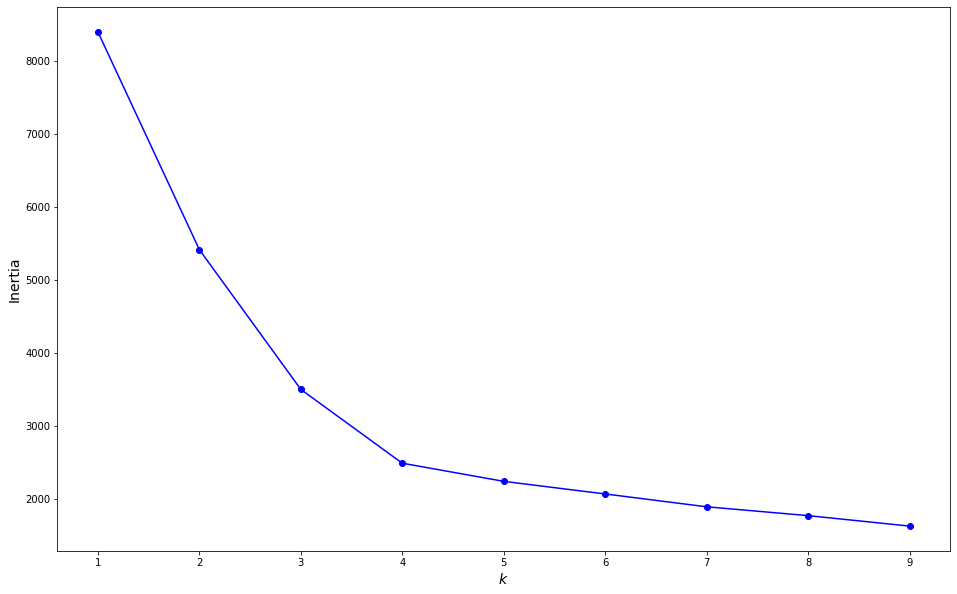

In [11]:
plt.figure(figsize=(16, 10))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [12]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10, # 加入這個 n_init=10 參數，sklearn會重複同樣的 code 10 次后選出最低inertia的結果
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(df)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=11)

In [13]:
len(kmeans_rnd_10_inits.labels_)

230

### 看看Silhoutte score，選cluster數目

In [14]:
from sklearn.metrics import silhouette_score

In [15]:
silhouette_score(df, kmeans_rnd_10_inits.labels_)

0.33798300668388714

In [16]:
silhouette_scores = [silhouette_score(df, model.labels_)
                     for model in kmeans_per_k[1:]]

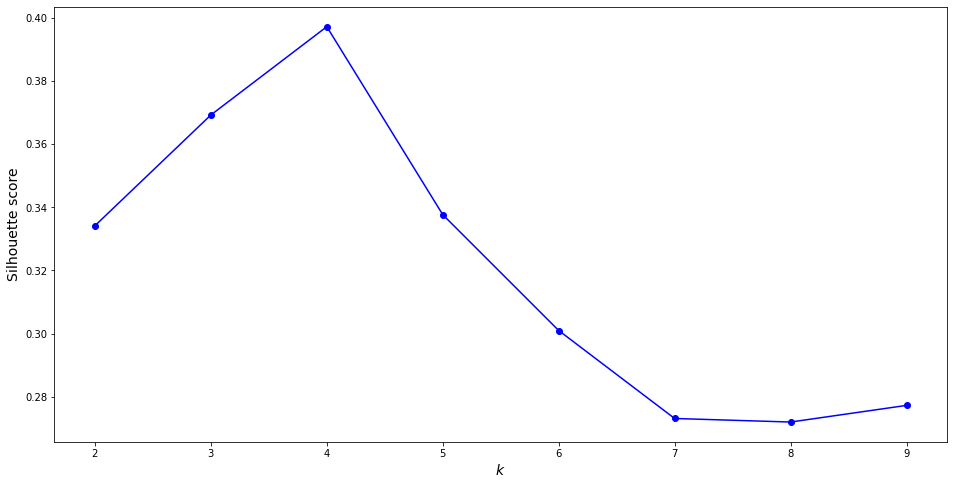

In [17]:
plt.figure(figsize=(16, 8))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

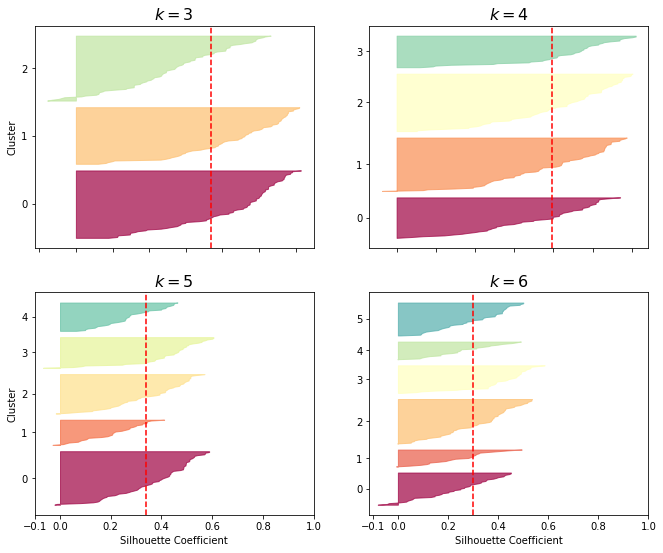

In [19]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(df, y_pred)

    padding = len(df) // 30 # 這裏放你的X
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

### 選好了 cluster 數目我們就來分析分析看看

In [28]:
k = 4# 你認爲有幾個cluster
kmeans = KMeans(n_clusters=k)
y_pred - kmeans.fit_predict(df)

array([ 3, -1,  3,  3, -1,  3,  3, -2, -1,  3,  3,  3,  3, -1, -1, -1,  3,
       -1, -1,  3,  3, -1,  3,  3,  1, -1,  3,  3,  3,  0, -1,  3, -1,  1,
       -1, -1,  3, -1, -1, -1,  3,  1,  3, -1,  3, -1,  3, -1,  3,  1,  3,
       -1, -1, -2, -1,  3,  3,  3,  3,  3, -1,  3, -1, -1,  3, -2, -1, -1,
       -1, -1,  0, -1,  3, -1,  3, -1, -1, -1, -1,  1,  0, -1, -1,  3,  3,
        1, -1,  0,  3,  3, -1,  3, -1,  3, -1, -1, -1,  1, -1, -1,  3, -1,
       -1, -1,  0,  3,  3, -1, -2,  1,  1,  0,  3,  3,  3,  3,  3,  3, -1,
       -1,  3,  3,  3,  3, -1, -1, -1,  3, -1,  3, -1, -1,  3, -1, -1,  3,
        3, -1,  3, -1,  3,  3, -1, -1,  3, -1, -1,  3, -1,  3, -1,  3, -1,
       -1,  3,  3,  3, -1,  3, -1, -1, -1, -1, -1, -1,  3,  3, -1, -1,  3,
       -1, -1,  0,  3, -1, -1, -1,  0,  3,  3, -1,  3,  3, -1, -1, -1, -1,
        3, -2, -1, -1,  3,  1, -1,  3,  0,  1,  3, -1, -1, -1, -1, -1, -1,
        3,  3,  3,  3, -1,  3,  3, -1, -1,  3, -1, -1,  3, -1,  3, -1, -2,
        3,  3,  3,  3,  3

看看下cluster的中心點，我想這只是一堆數字你應該沒有感覺。

In [29]:
kmeans.cluster_centers_

array([[ 9.825     , 12.15      , 11.7       ],
       [ 4.68656716, 12.53731343,  5.52238806],
       [ 8.88235294,  5.15686275,  9.74509804],
       [ 3.81944444,  5.30555556,  5.45833333]])

我們在這裏把中心點來視覺化看看。

In [30]:
list_cluster = []
for i in range(k):
  cluster = "cluster_" + str(i+1)
  list_cluster.append(cluster)

df_centers = pd.DataFrame(kmeans.cluster_centers_, columns = df.columns, index = list_cluster).reset_index()
df_centers_col = ['cluster']
for i in df.columns:
  df_centers_col.append(i)
df_centers.columns = df_centers_col

得到了這樣一個dataframe，這是一個‘wide’格式的dataframe（這名字我沒有在瞎掰~）


In [31]:
df_centers

,cluster,Intimacy,Passion,Commitment
0,cluster_1,9.825000,12.150000,11.700000
1,cluster_2,4.686567,12.537313,5.522388
2,cluster_3,8.882353,5.156863,9.745098
3,cluster_4,3.819444,5.305556,5.458333


爲了畫圖我們需要把格式dataframe的格式從‘wide’格式，改到‘long’格式

In [32]:
df_centers_viz = df_centers.melt(id_vars = 'cluster')

In [33]:
df_centers_viz

,cluster,variable,value
0,cluster_1,Intimacy,9.825000
1,cluster_2,Intimacy,4.686567
2,cluster_3,Intimacy,8.882353
3,cluster_4,Intimacy,3.819444
4,cluster_1,Passion,12.150000
5,cluster_2,Passion,12.537313
6,cluster_3,Passion,5.156863
7,cluster_4,Passion,5.305556
8,cluster_1,Commitment,11.700000
9,cluster_2,Commitment,5.522388


開始畫圖，然後你可以問問自己下列的問題再決定後續步驟。

*   你能得出什麽結論嗎？
*   這結果符合你的預期嗎？
*   這結果好解釋嗎（你能為每個cluster命名嗎？e.g.神仙眷侶組，只剩承諾組etc.）？
*   有需要重新設定cluster數目嗎？

In [34]:
import seaborn as sns

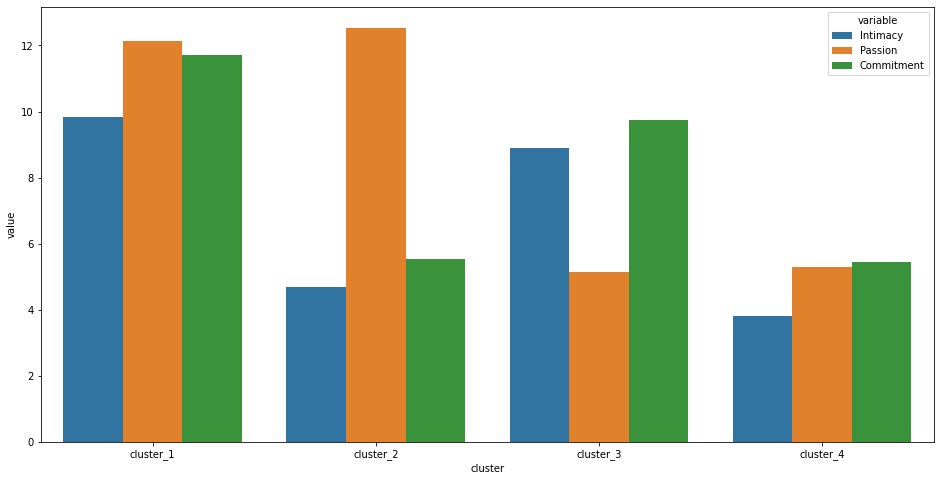

In [35]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x="cluster", y="value", hue="variable", data=df_centers_viz)

# 探索性因素分析 Exploratory Factor Analysis（航空服務問卷資料集）

**Airline Passenger Satisfaction**

https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

This dataset contains an airline passenger satisfaction survey. 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
df = pd.read_csv("Airline.csv")
df.drop(columns="Unnamed: 0", inplace = True)

In [37]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [38]:
df.drop(['id'], axis=1, inplace=True)

## 畫畫看相關係數矩陣

In [39]:
x = df.iloc[:,6:20]

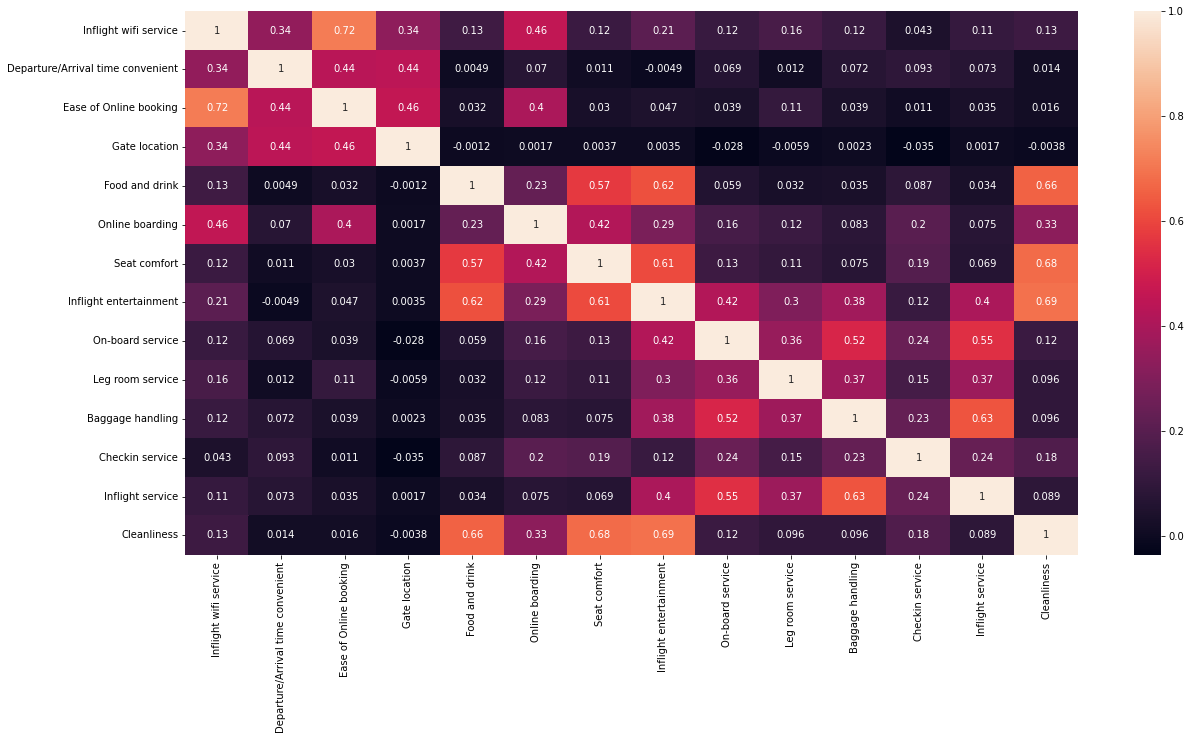

In [40]:
plt.figure(figsize=(20,10))
c= x.corr()
sns.heatmap(c, annot=True) # 如果不想看數字就 annot = False 

希望你能看出某種‘一團一團’的感覺。

## 開始進行因素分析

在python做因素分析需要一個新的套件，請執行下列程式下載factor_analyzer

In [41]:
!pip install factor_analyzer  
from factor_analyzer import FactorAnalyzer

     |████████████████████████████████| 41 kB 413 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=8deac79fb97c59f149a7d2496f6e16f4593ab309a70f90b327c75a732c471681
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


### 選取因素數

Text(0.5, 0, 'Factor')

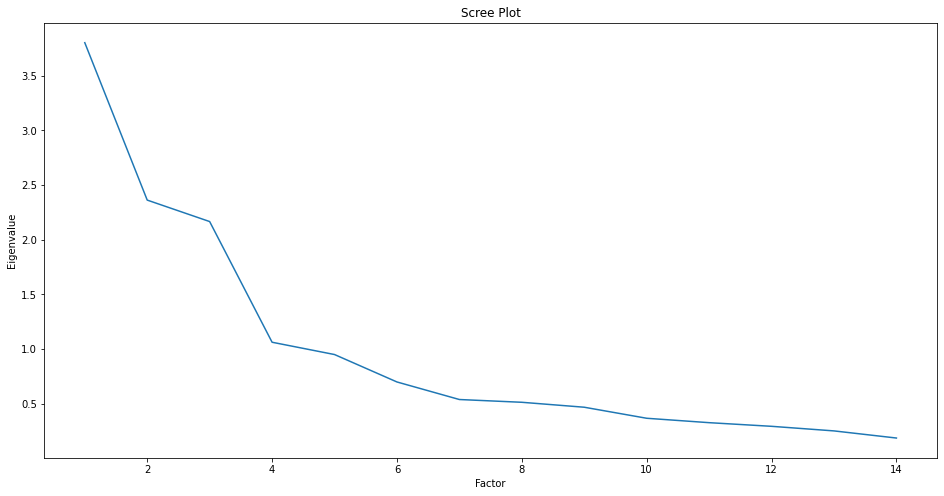

In [42]:
#Subset of the data, the 14 columns containing the survey answers
x =df[df.columns[6:20]]  # 把要進行因素分析的部分叫做x
fa = FactorAnalyzer()
fa.fit(x, 10)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()

plt.figure(figsize=(16, 8))
plt.plot(range(1,x.shape[1]+1),ev)
plt.title('Scree Plot')
plt.ylabel("Eigenvalue")
plt.xlabel("Factor")

最簡單的情況下我們通常會選大於1的eigenvalue的factor數目，同時考量到elbow這個參照方式，不過還是要各位記得，這種圖提供的參考不是一個值，是一個大致的範圍，3和5你也應該試一試。

### 開始分析 + 結果解讀

In [53]:
f = 4 # 請在這裏改動你要的因素數目
fa = FactorAnalyzer(f, rotation='promax') # rotation = “promax”為斜交轉軸，如果你要正交轉軸請用 rotation = “varimax”，不過今晚的主厨推薦菜單是“斜交轉軸”

# 關於轉軸方式不止這兩種，不過我們今天只討論這兩種，如果有興趣知道更多有兩個方法：
# 1. Google
# 2. 來成大上心理計量或統計所的課一到二學期

fa.fit(x)
loads = fa.loadings_
print(loads) # 顯示的是在各個變項上的因素負載量 Factor loading，是什麽意思請聼我（林成鍇 Julius Ling）在臺上的説明，這個非常重要！！！

# 一樣是一堆數字，一樣無感，我在下面會將它視覺化給各位看

[[-0.01794284  0.04127169  0.49974982  0.46400125]
 [ 0.01623422  0.05408694  0.60681725 -0.06873295]
 [-0.12866946 -0.04902068  0.66593903  0.45073945]
 [ 0.08260964 -0.04143373  0.73036679 -0.18767422]
 [ 0.810338   -0.12042473  0.05791988 -0.03273307]
 [ 0.08828555 -0.04130281 -0.09247903  0.82318687]
 [ 0.73263603 -0.06541502 -0.05331772  0.16924797]
 [ 0.74702356  0.36702057  0.05887885 -0.08035769]
 [-0.01340335  0.71501369 -0.01317688 -0.00860161]
 [-0.0276616   0.48343513  0.00888344  0.06179636]
 [-0.05189011  0.80176909  0.04349431 -0.10795321]
 [ 0.04895714  0.26204637 -0.0617559   0.1194872 ]
 [-0.05182885  0.84339315  0.04826406 -0.13509209]
 [ 0.87043564 -0.05917933  0.00930522  0.02874775]]


這個是爲了畫圖做的一些步驟（我在進行一些矩陣上的操弄~）

In [54]:
a,b,c = fa.get_factor_variance()
a = np.expand_dims(a, axis=0)
b = np.expand_dims(b, axis=0)
c = np.expand_dims(c, axis=0)
arr_var = np.concatenate((a, b, c), axis=0)
d = np.array([[np.nan, np.nan, np.nan]])
arr_var = np.concatenate((arr_var, d.T), axis=1)

communality = fa.get_communalities()
communality = np.expand_dims(communality, axis=0)
arr_load = np.concatenate((loads, communality.T), axis=1)

arr_load = np.concatenate((arr_load, arr_var), axis=0)

arr_load

array([[-0.01794284,  0.04127169,  0.49974982,  0.46400125,  0.46707234],
       [ 0.01623422,  0.05408694,  0.60681725, -0.06873295,  0.37614035],
       [-0.12866946, -0.04902068,  0.66593903,  0.45073945,  0.6655997 ],
       [ 0.08260964, -0.04143373,  0.73036679, -0.18767422,  0.57719837],
       [ 0.810338  , -0.12042473,  0.05791988, -0.03273307,  0.67557595],
       [ 0.08828555, -0.04130281, -0.09247903,  0.82318687,  0.69568925],
       [ 0.73263603, -0.06541502, -0.05331772,  0.16924797,  0.57252234],
       [ 0.74702356,  0.36702057,  0.05887885, -0.08035769,  0.70267238],
       [-0.01340335,  0.71501369, -0.01317688, -0.00860161,  0.51167184],
       [-0.0276616 ,  0.48343513,  0.00888344,  0.06179636,  0.2383724 ],
       [-0.05189011,  0.80176909,  0.04349431, -0.10795321,  0.65907191],
       [ 0.04895714,  0.26204637, -0.0617559 ,  0.1194872 ,  0.08915608],
       [-0.05182885,  0.84339315,  0.04826406, -0.13509209,  0.73457752],
       [ 0.87043564, -0.05917933,  0.0

In [55]:
index_col = []
for i in x.columns:
  index_col.append(i)
index_col = index_col + ['SS_Loading', 'Proportional_Variance', 'Cumulative_Variance']

list_factor = []
for i in range(f):
  factor = "factor_" + str(i+1)
  list_factor.append(factor)
list_factor = list_factor + ['Total_Communalities']

df_load = pd.DataFrame(data=arr_load, index=index_col, columns=list_factor)

In [56]:
df_load.round(3) # 這張表非常有用, 如果需要呈現表格請將這個dataframe輸出成csv

# df_load.to_csv("檔案名稱.csv")

,factor_1,factor_2,factor_3,factor_4,Total_Communalities
Inflight wifi service,-0.018,0.041,0.500,0.464,0.467
Departure/Arrival time convenient,0.016,0.054,0.607,-0.069,0.376
Ease of Online booking,-0.129,-0.049,0.666,0.451,0.666
Gate location,0.083,-0.041,0.730,-0.188,0.577
Food and drink,0.810,-0.120,0.058,-0.033,0.676
Online boarding,0.088,-0.041,-0.092,0.823,0.696
Seat comfort,0.733,-0.065,-0.053,0.169,0.573
Inflight entertainment,0.747,0.367,0.059,-0.080,0.703
On-board service,-0.013,0.715,-0.013,-0.009,0.512
Leg room service,-0.028,0.483,0.009,0.062,0.238


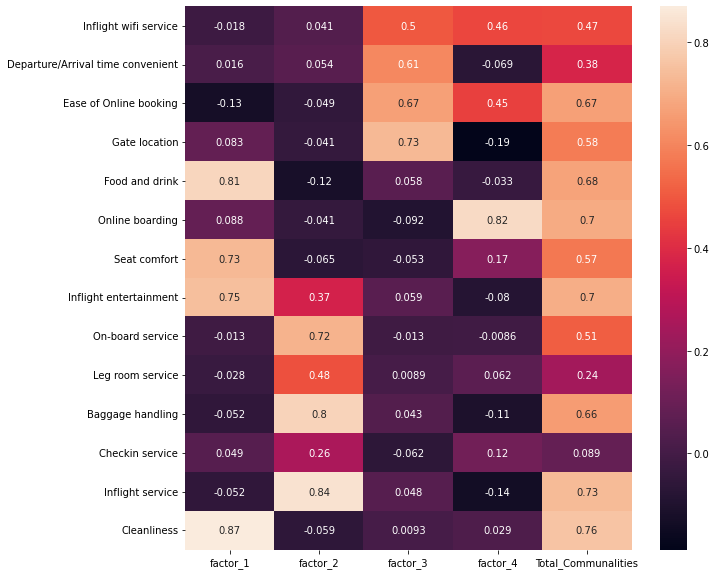

In [57]:
# 我把上面的表格中的一部分視覺化出來，這東西叫Pattern Matrix
plt.figure(figsize=(10,10))
sns.heatmap(df_load.iloc[0:-3, ], annot=True)

可以問問自己下列的問題再決定後續步驟。

*   你能得出什麽結論嗎？
*   這結果符合你的預期嗎？
*   這結果好解釋嗎（你能為每個factor命名嗎？）？
*   有需要重新設定factor數目嗎？
*   需要把什麽題目（or變項）刪去嗎？

對於已經脫離了新手村的進階的分析師或研究者：

*   有需要更改轉軸方式嗎？
*   選擇理論導向還是資料導向的分析結果
*   理論和資料導向的差別？爲什麽會有差別？是理論有問題還是收集數據的環節有問題？什麽問題？
*   有什麽新發現？對結果進行推論，還能夠進行什麽樣的後續研究？

嘗試回答上述問題並為結果佐證，提出**具有說服力的結論**，這已經可以成爲一個不錯的研究了。

With Loading = 0.5 as a cutoff point, we have the three factors nicely created:

1) **Comfort**: Food and Drink, Seat Comfort, Inflight Entertainment, Cleanliness

2) **Service**: On-board Service, Baggage Handling, Inflight Service

3) **Convenience**: Inflight Wifi Service, Departure/Arrival Time Convenient, Ease of Online Booking, Gate Location

**3 variables are left out**: Online Boarding, Leg Room Service, Check In Service (Note that their respective communalities are minute as well)


# 探索性因素分析實務（性格測驗）

資料來源：https://www.personality-project.org/r/html/bfi.html


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [ ]:
df = pd.read_table("Personality.txt", sep = ' ')
df.columns = ['對別人的感覺無感', '關心別人的幸福', '懂得安慰別人', '喜歡小孩', '讓人覺得沒壓力', 
              '做事情要求精確', '完美主義傾向', '做事有規劃', '做事半途而廢', '總浪費時間', 
              '不愛講話', '和陌生人交際有困難','知道如何吸引他人', '善於交朋友', '交際中掌控主動權', 
              '易怒', '易煩躁', '時常情緒轉換', '常傷心', '容易緊張', 
              '多點子', '不愛閲讀較難的文章', '講話題帶往更高層次', '善於反思','不易深究一個領域']

In [ ]:
df

,對別人的感覺無感,關心別人的幸福,懂得安慰別人,喜歡小孩,讓人覺得沒壓力,做事情要求精確,完美主義傾向,做事有規劃,做事半途而廢,總浪費時間,不愛講話,和陌生人交際有困難,知道如何吸引他人,善於交朋友,交際中掌控主動權,易怒,易煩躁,時常情緒轉換,常傷心,容易緊張,多點子,不愛閲讀較難的文章,講話題帶往更高層次,善於反思,不易深究一個領域
0,2,4,3,4,4,2,3,3,4,4,3,3,3,4,4,3,4,2,2,3,3,6,3,4,3
1,2,4,5,2,5,5,4,4,3,4,1,1,6,4,3,3,3,3,5,5,4,2,4,3,3
2,5,4,5,4,4,4,5,4,2,5,2,4,4,4,5,4,5,4,2,3,4,2,5,5,2
3,4,4,6,5,5,4,4,3,5,5,5,3,4,4,4,2,5,2,4,1,3,3,4,3,5
4,2,3,3,4,5,4,4,5,3,2,2,2,5,4,5,2,3,4,4,3,3,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431,3,4,3,1,3,5,4,5,3,4,3,5,2,3,1,5,6,5,5,6,6,1,4,5,2
2432,5,5,5,5,3,5,4,2,3,5,3,5,5,6,5,4,5,3,5,2,6,1,5,6,2
2433,2,3,5,2,5,5,5,5,1,1,2,2,6,3,6,3,4,3,3,1,5,1,6,4,3
2434,5,2,2,4,4,5,5,5,2,6,2,2,4,5,4,5,5,6,4,1,5,2,5,5,1


In [ ]:
df.describe()

,對別人的感覺無感,關心別人的幸福,懂得安慰別人,喜歡小孩,讓人覺得沒壓力,做事情要求精確,完美主義傾向,做事有規劃,做事半途而廢,總浪費時間,不愛講話,和陌生人交際有困難,知道如何吸引他人,善於交朋友,交際中掌控主動權,易怒,易煩躁,時常情緒轉換,常傷心,容易緊張,多點子,不愛閲讀較難的文章,講話題帶往更高層次,善於反思,不易深究一個領域
count,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000
mean,2.406404,4.797209,4.598522,4.687603,4.543514,4.525041,4.372332,4.300082,2.549672,3.305829,2.978654,3.154351,3.984401,4.408867,4.390805,2.943760,3.517652,3.224548,3.202381,2.971264,4.812808,2.684729,4.449918,4.925287,2.468801
std,1.407177,1.179535,1.311355,1.485213,1.270804,1.235258,1.319152,1.291202,1.376689,1.632720,1.631428,1.613847,1.351766,1.467060,1.343316,1.575909,1.533238,1.594674,1.569633,1.623491,1.126613,1.552883,1.205206,1.193136,1.324021
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,1.000000,4.000000,4.000000,1.000000
50%,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,5.000000,3.000000,4.000000,3.000000,3.000000,3.000000,5.000000,2.000000,5.000000,5.000000,2.000000
75%,3.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,6.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,6.000000,4.000000,5.000000,6.000000,3.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


## 畫相關矩陣

Python的視覺化套件（Matplotlib和Seaborn）不能顯示中文字串，我們先解決這個問題。

參考教程：https://colab.research.google.com/github/willismax/matplotlib_show_chinese_in_colab/blob/master/matplotlib_show_chinese_in_colab.ipynb#scrollTo=RfR0uymWF3cB

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2021-12-22 05:45:35--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.203.138, 172.217.203.100, 172.217.203.139, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hnt4483pd23cbvggk7ho3ci16htua92a/1640151900000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-12-22 05:45:39--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hnt4483pd23cbvggk7ho3ci16htua92a/1640151900000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.31.132, 2607:f8b0:400c:c02::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|74.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]), <a list of 25 Text major ticklabel objects>)

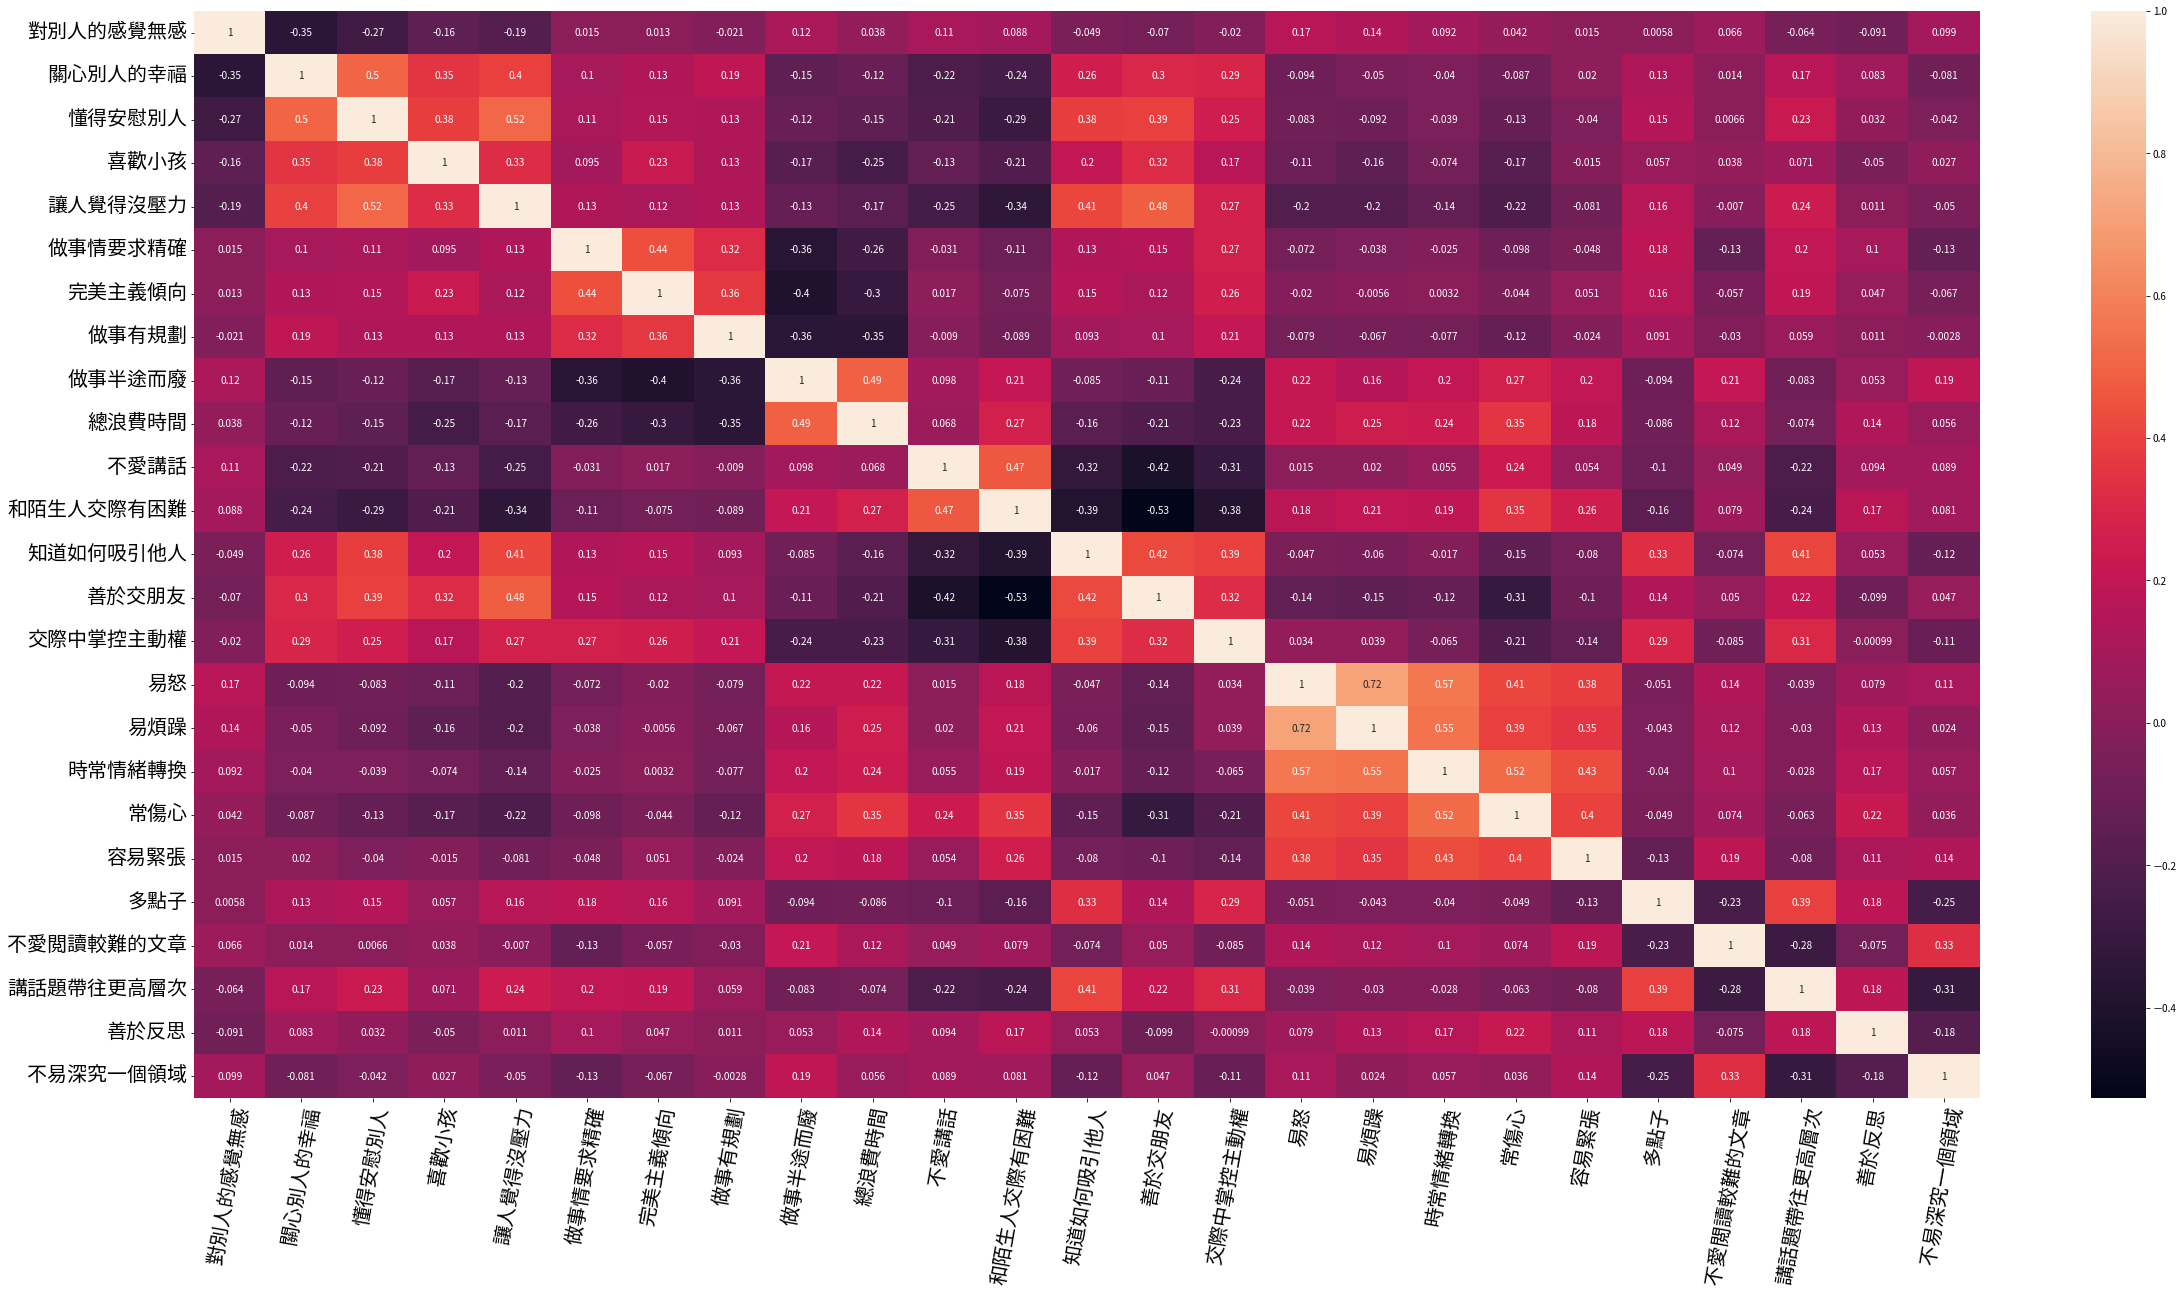

In [ ]:
plt.figure(figsize=(40,20))
c= df.corr()
sns.heatmap(c, annot = True)
plt.xticks(size = 20, rotation = 80)
plt.yticks(size = 20)

### 處理反向計分題

你應該有注意到有些題目是方向計分題，需要做些處理。

In [ ]:
df.對別人的感覺無感 = 7 - df.對別人的感覺無感
df.做事半途而廢 = 7 - df.做事半途而廢
df.總浪費時間 = 7 - df.總浪費時間
df.不愛講話 = 7 - df.不愛講話
df.和陌生人交際有困難 = 7 - df.和陌生人交際有困難
df.不愛閲讀較難的文章 = 7 - df.不愛閲讀較難的文章
df.不易深究一個領域 = 7 - df.不易深究一個領域

再畫一次相關矩陣

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]), <a list of 25 Text major ticklabel objects>)

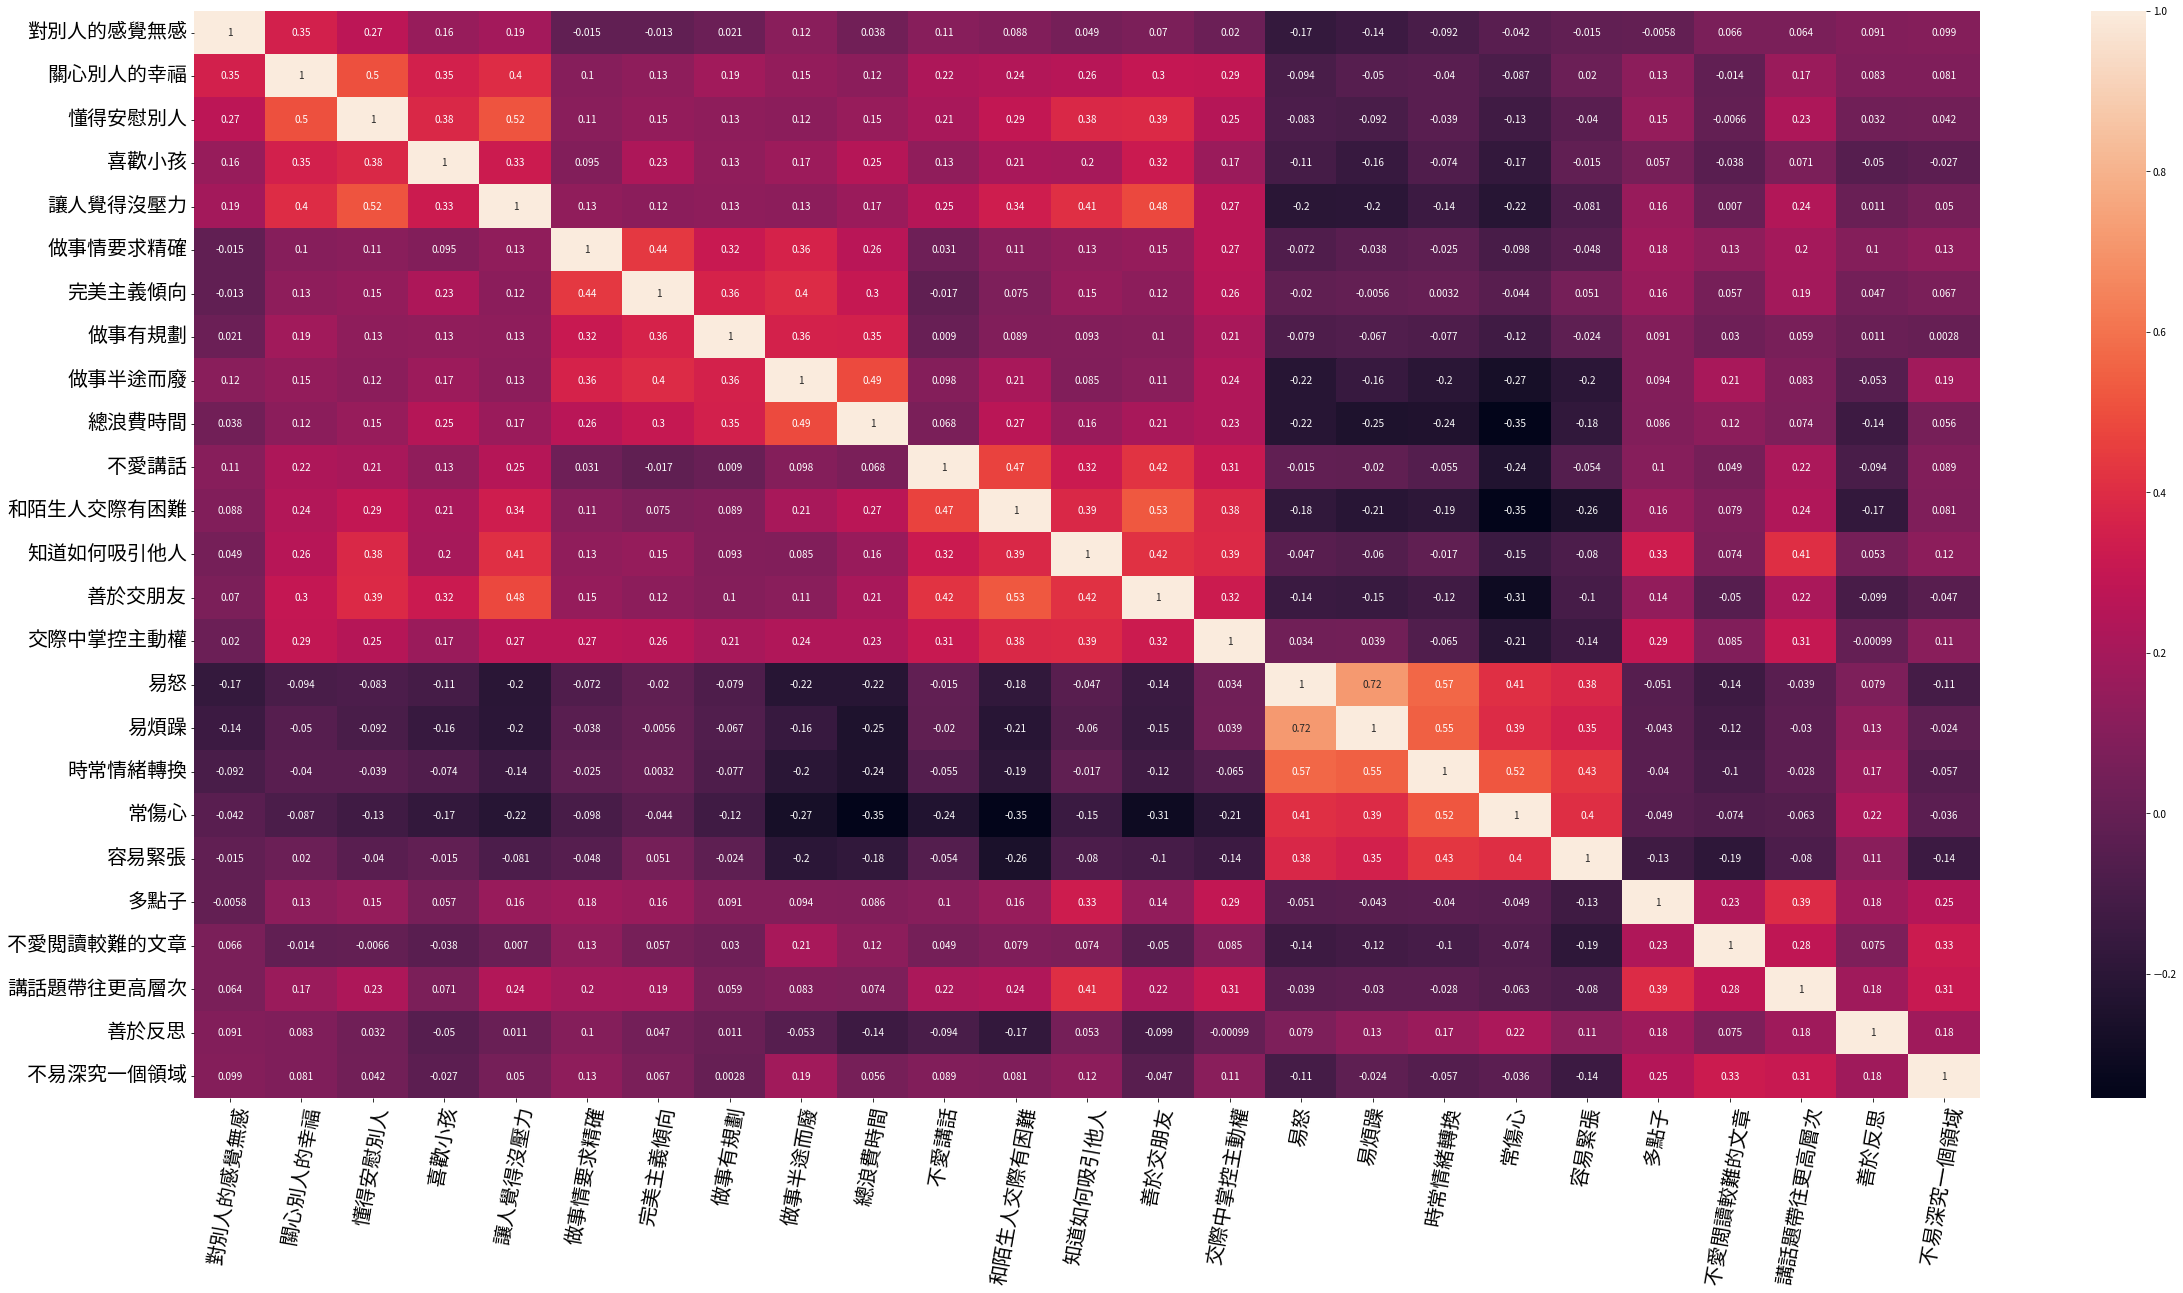

In [ ]:
plt.figure(figsize=(40,20))
c= df.corr()
sns.heatmap(c, annot = True)
plt.xticks(size = 20, rotation = 80)
plt.yticks(size = 20)

## 選因素數目

In [ ]:
# 下載套件，如果已經下載就不需要再執行這段程式
# !pip install factor_analyzer  
# from factor_analyzer import FactorAnalyzer

Text(0.5, 0, 'Factor')

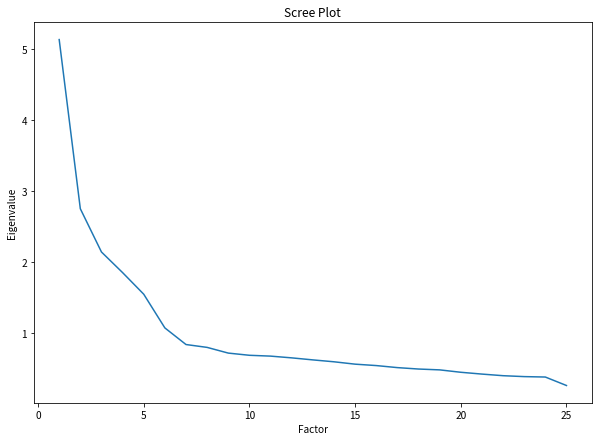

In [ ]:
x = df # 把要進行因素分析的部分叫做x
fa = FactorAnalyzer()
fa.fit(x, 10)
#Get the Eigenvalues and plot them
ev, v = fa.get_eigenvalues()

plt.figure(figsize=(10,7))
plt.plot(range(1,x.shape[1]+1),ev)
plt.title('Scree Plot')
plt.ylabel("Eigenvalue")
plt.xlabel("Factor")

## 分析與結果解讀

In [ ]:
f = ？# 輸入你認爲有幾個factor
fa = FactorAnalyzer(f, rotation='promax')
fa.fit(x)
loads = fa.loadings_

In [ ]:
a,b,c = fa.get_factor_variance()
a = np.expand_dims(a, axis=0)
b = np.expand_dims(b, axis=0)
c = np.expand_dims(c, axis=0)
arr_var = np.concatenate((a, b, c), axis=0)
d = np.array([[np.nan, np.nan, np.nan]])
arr_var = np.concatenate((arr_var, d.T), axis=1)

communality = fa.get_communalities()
communality = np.expand_dims(communality, axis=0)
arr_load = np.concatenate((loads, communality.T), axis=1)

arr_load = np.concatenate((arr_load, arr_var), axis=0)

index_col = []
for i in x.columns:
  index_col.append(i)
index_col = index_col + ['SS_Loading', 'Proportional_Variance', 'Cumulative_Variance']

list_factor = []
for i in range(f):
  factor = "factor_" + str(i+1)
  list_factor.append(factor)
list_factor = list_factor + ['Total_Communalities']

df_load = pd.DataFrame(data=arr_load, index=index_col, columns=list_factor)

In [ ]:
df_load

In [ ]:
# df_load.to_csv("df_load.csv")

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_load.iloc[0:-3, ], annot=True)
plt.yticks(size = 12) # 要讓y軸顯示中文